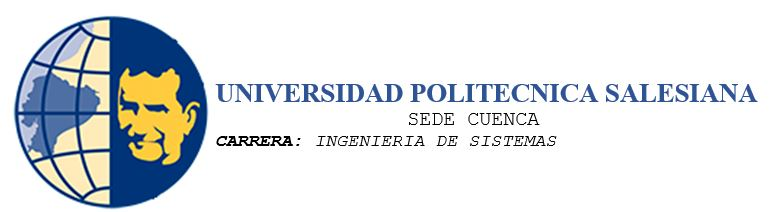

<h6 style="text-align: center;">Nombre: Bryam Gabriel Mora Lituma</h6>
<h6 style="text-align: center;">Materia: Simulacion</h6>
<h6 style="text-align: center;">Fecha:04/07/2021</h6>

Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
•En base a los datos del siguiente link https://educacion.gob.ec/wp-content/uploads/downloads/2012/08/AZUAY11.pdf, genere una simulación del ingresos de los estudiantes, para ello debemos escoger un establecimiento y en base a los docentes y estudiantes modelar el reingreso de los estudiantes en base a los siguientes datos.
    
◦	Solo se va a tener en cuenta uno de los planteles educativos(Escuela, colegio, universidad dentro del Azuay).
    
◦	Se tiene un promedio que el 90% de los docentes han sido vacunados y pueden realizar el proceso de ingreso en cada  uno de los cursos.

◦	Dentro del procesos se tiene que alrededor del 5% - 10% de los estudiantes no podrán asistir debido a no presentar la vacuna/enfermedades adyacentes.

◦	Los estudiantes solo pertenecen a una sola entidad educativa al igual que los docentes.

◦	Se va  a tener un periodo de prueba de un mes, posterior a ello se realiza al azar al 10% de estudiantes una prueba PCR para validar que no estén contagiados.

◦	De la ultima el 2% de los estudiantes dan positivo por lo que se cierra el curso completo.

◦	Los estudiantes asisten cada semana y estos están en un horario de 6 horas ya sea diurno o nocturno.

◦	Tienen un receso 30 minutos dentro del establecimiento en donde se concentran todos los estudiantes y exite un foco de contagio del 2%.

•	El proceso de simulación desarrollado deberá considerar los siguientes aspectos:

◦	Generar un cuaderno de Python para el desarrollo y parametrización de graficas, reportes, y animación (Simpy).
    
◦	Generar una animación en 2D/3D del modelo propuesto.

◦	Obtener los siguientes análisis:

◦	Cuantos contagiados tengo al final del mes.
    
◦	Cuantos cursos debo cerrar.
    
◦	Cuantos estudiantes y docentes ingresan y salen al final del mes.

Unidad Educativa: Sudamericano

Estudiantes.

Número total de estudiantes de genero femenino: 212

Número total de estudiantes de genero masculino: 350

Número total de estudiantes del establecimiento: 562

Docentes.

Número de Docentes genero femenino: 24

Número de Docentes genero masculino: 16

Número total de profesores: 40

Aulas: 30

https://www.infoescuelas.com/ecuador/azuay/unidad-educativa-particular-sudamericano-en-cuenca/

#### Importamos las librerias

In [100]:
import random
import simpy
import random
import collections
import matplotlib.pyplot as pp

#### Iniciamamos nuestras variables 

In [101]:
PROFESORES = 40
P_PROF_VACUNADOS = int(PROFESORES*0.9)
VACUNADOS_PROF = PROFESORES - P_PROF_VACUNADOS
print("Profesores: ",PROFESORES)
print("Profesores vacunados: ",P_PROF_VACUNADOS)
print("Profesores no vacunados:",VACUNADOS_PROF)
ESTUDIANTES = 562
print("Estudiantes: ",ESTUDIANTES)
P_ESTUDIANTES_NO = random.randint(5,10)
print("Porcentaje de estudiantes que no asisten: ",P_ESTUDIANTES_NO,"%")
ESTUDIANTES_NO_ASISTEN = int(ESTUDIANTES * P_ESTUDIANTES_NO /100)
print("Numero de estudiantes que no asisten: ",ESTUDIANTES_NO_ASISTEN)
ESTUDIANTES_ASISTEN = ESTUDIANTES-ESTUDIANTES_NO_ASISTEN
print("Numero de estudiantes que asisten: ",ESTUDIANTES_ASISTEN)

#Total de estudiantes y profesores vacunados que asisten
TOTAL = P_PROF_VACUNADOS + ESTUDIANTES_ASISTEN

TOTAL_CONTAGIADOS = 0

print("Total de profesores y estudiantes tanto vacunados y que asisten: ",TOTAL)

cursos = ['curso 1','curso 2','curso 3','curso 4','curso 5','curso 6']
aula1 = {}
aula2 = {}
aula3 = {}
aula4 = {}
aula5 = {}
aula6 = {}

#print("Cursos: ",cursos)

#Para el numero de contagiados al final del 
contagiados = []

Profesores:  40
Profesores vacunados:  36
Profesores no vacunados: 4
Estudiantes:  562
Porcentaje de estudiantes que no asisten:  5 %
Numero de estudiantes que no asisten:  28
Numero de estudiantes que asisten:  534
Total de profesores y estudiantes tanto vacunados y que asisten:  570


#### Metodos para asignar el aula y la clase

In [102]:
def uso_aula(env,estudiante,aula,curso):
    print(aula)
    print("Hora Ingreso",env.now)
    if aula=="Curso 1":
        aula1[estudiante]=estudiante
        yield env.timeout(0.01)
        return
    if aula=="Curso 2":
        aula2[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    if aula=="Curso 3":
        aula3[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    if aula=="Curso 4":
        aula4[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    if aula=="Curso 5":
        aula5[estudiante]=estudiante
        yield env.timeout(0.01)
        return
    if aula=="Curso 6":
        aula6[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    yield env.timeout(0.05)
    return
        
def clases(env, curso):
    print("Clases")
    c = 0
    while True:
        yield env.timeout(random.expovariate(1/0.005))
        print("time ",env.now)
        aula = random.choice(curso.cursos)
        print("El estudiante pertenece al curso. ",aula)
        print("Hora: ",env.now)
        estudiante = curso.estudiantes[c]
        print("Estudiante. ",estudiante)
        tot = len(aula1)+len(aula2)+len(aula3)+len(aula4)+len(aula5)+len(aula6)
        if tot < curso.n_estudiantes:
            yield env.process(uso_aula(env, estudiante,aula,curso))
        else:
            print("Ya no hay mas estudiantes")
            print("Tiempo ",env.now)
            break
        c+=1

In [103]:
Curso = collections.namedtuple('Curso','contador,cursos,capacidad,usado,t_curso_lleno,puesto_usado,estudiantes,n_estudiantes')
print("Institucion educativa SUDAMERICANO")

env = simpy.Environment()

contador = simpy.Resource(env, capacity=6)
cursos = ["Curso 1","Curso 2","Curso 3","Curso 4","Curso 5","Curso 6"]
capacidad = {curso: int(((ESTUDIANTES_ASISTEN)/len(cursos))+3) for curso in cursos}
usado = {curso:env.event() for curso in cursos}
#Tiempo en el que el curso se llena
t_curso_lleno = {curso: None for curso in cursos}

#Numero de puestos usados
puesto_usado = {curso: 0 for curso in cursos}

estudiantes =[0] * ESTUDIANTES_ASISTEN
for j in range(ESTUDIANTES_ASISTEN):
    estudiantes[j] = "Estudiante "+str(j)

n_estudiantes = ESTUDIANTES_ASISTEN
    
print("cursos: ",cursos[1])

curs = Curso(contador, cursos, capacidad, usado,t_curso_lleno,puesto_usado,estudiantes,n_estudiantes)
env.process(clases(env,curs))
env.run(until=35)

Institucion educativa SUDAMERICANO
cursos:  Curso 2
Clases
time  0.003837897771951882
El estudiante pertenece al curso.  Curso 1
Hora:  0.003837897771951882
Estudiante.  Estudiante 0
Curso 1
Hora Ingreso 0.003837897771951882
time  0.01565993261623753
El estudiante pertenece al curso.  Curso 1
Hora:  0.01565993261623753
Estudiante.  Estudiante 1
Curso 1
Hora Ingreso 0.01565993261623753
time  0.026856624604640958
El estudiante pertenece al curso.  Curso 6
Hora:  0.026856624604640958
Estudiante.  Estudiante 2
Curso 6
Hora Ingreso 0.026856624604640958
time  0.039301061704287064
El estudiante pertenece al curso.  Curso 5
Hora:  0.039301061704287064
Estudiante.  Estudiante 3
Curso 5
Hora Ingreso 0.039301061704287064
time  0.0735546558351485
El estudiante pertenece al curso.  Curso 1
Hora:  0.0735546558351485
Estudiante.  Estudiante 4
Curso 1
Hora Ingreso 0.0735546558351485
time  0.09510981824172553
El estudiante pertenece al curso.  Curso 2
Hora:  0.09510981824172553
Estudiante.  Estudiante 

time  1.0433235064565305
El estudiante pertenece al curso.  Curso 3
Hora:  1.0433235064565305
Estudiante.  Estudiante 67
Curso 3
Hora Ingreso 1.0433235064565305
time  1.0628186341909576
El estudiante pertenece al curso.  Curso 1
Hora:  1.0628186341909576
Estudiante.  Estudiante 68
Curso 1
Hora Ingreso 1.0628186341909576
time  1.0735273231930769
El estudiante pertenece al curso.  Curso 6
Hora:  1.0735273231930769
Estudiante.  Estudiante 69
Curso 6
Hora Ingreso 1.0735273231930769
time  1.091370228947623
El estudiante pertenece al curso.  Curso 5
Hora:  1.091370228947623
Estudiante.  Estudiante 70
Curso 5
Hora Ingreso 1.091370228947623
time  1.10297555282349
El estudiante pertenece al curso.  Curso 4
Hora:  1.10297555282349
Estudiante.  Estudiante 71
Curso 4
Hora Ingreso 1.10297555282349
time  1.1135639085870341
El estudiante pertenece al curso.  Curso 5
Hora:  1.1135639085870341
Estudiante.  Estudiante 72
Curso 5
Hora Ingreso 1.1135639085870341
time  1.127033799326041
El estudiante perte

Estudiante.  Estudiante 170
Curso 1
Hora Ingreso 2.523453653644416
time  2.5346370191574947
El estudiante pertenece al curso.  Curso 2
Hora:  2.5346370191574947
Estudiante.  Estudiante 171
Curso 2
Hora Ingreso 2.5346370191574947
time  2.5557863475670546
El estudiante pertenece al curso.  Curso 2
Hora:  2.5557863475670546
Estudiante.  Estudiante 172
Curso 2
Hora Ingreso 2.5557863475670546
time  2.5682344384983438
El estudiante pertenece al curso.  Curso 1
Hora:  2.5682344384983438
Estudiante.  Estudiante 173
Curso 1
Hora Ingreso 2.5682344384983438
time  2.5971999298197512
El estudiante pertenece al curso.  Curso 2
Hora:  2.5971999298197512
Estudiante.  Estudiante 174
Curso 2
Hora Ingreso 2.5971999298197512
time  2.607823000206364
El estudiante pertenece al curso.  Curso 3
Hora:  2.607823000206364
Estudiante.  Estudiante 175
Curso 3
Hora Ingreso 2.607823000206364
time  2.620467642241852
El estudiante pertenece al curso.  Curso 4
Hora:  2.620467642241852
Estudiante.  Estudiante 176
Curso 

Estudiante.  Estudiante 231
Curso 5
Hora Ingreso 3.4282825667323635
time  3.4505567241064785
El estudiante pertenece al curso.  Curso 6
Hora:  3.4505567241064785
Estudiante.  Estudiante 232
Curso 6
Hora Ingreso 3.4505567241064785
time  3.469095374422852
El estudiante pertenece al curso.  Curso 1
Hora:  3.469095374422852
Estudiante.  Estudiante 233
Curso 1
Hora Ingreso 3.469095374422852
time  3.4849630235911118
El estudiante pertenece al curso.  Curso 5
Hora:  3.4849630235911118
Estudiante.  Estudiante 234
Curso 5
Hora Ingreso 3.4849630235911118
time  3.4957051913770174
El estudiante pertenece al curso.  Curso 5
Hora:  3.4957051913770174
Estudiante.  Estudiante 235
Curso 5
Hora Ingreso 3.4957051913770174
time  3.50753413123904
El estudiante pertenece al curso.  Curso 5
Hora:  3.50753413123904
Estudiante.  Estudiante 236
Curso 5
Hora Ingreso 3.50753413123904
time  3.52130649877015
El estudiante pertenece al curso.  Curso 1
Hora:  3.52130649877015
Estudiante.  Estudiante 237
Curso 1
Hora 

time  4.71553719748083
El estudiante pertenece al curso.  Curso 6
Hora:  4.71553719748083
Estudiante.  Estudiante 319
Curso 6
Hora Ingreso 4.71553719748083
time  4.730874234703427
El estudiante pertenece al curso.  Curso 4
Hora:  4.730874234703427
Estudiante.  Estudiante 320
Curso 4
Hora Ingreso 4.730874234703427
time  4.742504051455447
El estudiante pertenece al curso.  Curso 3
Hora:  4.742504051455447
Estudiante.  Estudiante 321
Curso 3
Hora Ingreso 4.742504051455447
time  4.761673039464925
El estudiante pertenece al curso.  Curso 3
Hora:  4.761673039464925
Estudiante.  Estudiante 322
Curso 3
Hora Ingreso 4.761673039464925
time  4.772303353075553
El estudiante pertenece al curso.  Curso 4
Hora:  4.772303353075553
Estudiante.  Estudiante 323
Curso 4
Hora Ingreso 4.772303353075553
time  4.782517208284077
El estudiante pertenece al curso.  Curso 5
Hora:  4.782517208284077
Estudiante.  Estudiante 324
Curso 5
Hora Ingreso 4.782517208284077
time  4.805532662139051
El estudiante pertenece a

time  6.017120577591383
El estudiante pertenece al curso.  Curso 4
Hora:  6.017120577591383
Estudiante.  Estudiante 407
Curso 4
Hora Ingreso 6.017120577591383
time  6.028367053052988
El estudiante pertenece al curso.  Curso 2
Hora:  6.028367053052988
Estudiante.  Estudiante 408
Curso 2
Hora Ingreso 6.028367053052988
time  6.052111115590345
El estudiante pertenece al curso.  Curso 2
Hora:  6.052111115590345
Estudiante.  Estudiante 409
Curso 2
Hora Ingreso 6.052111115590345
time  6.067792548478314
El estudiante pertenece al curso.  Curso 1
Hora:  6.067792548478314
Estudiante.  Estudiante 410
Curso 1
Hora Ingreso 6.067792548478314
time  6.07862917206398
El estudiante pertenece al curso.  Curso 5
Hora:  6.07862917206398
Estudiante.  Estudiante 411
Curso 5
Hora Ingreso 6.07862917206398
time  6.101873858814404
El estudiante pertenece al curso.  Curso 3
Hora:  6.101873858814404
Estudiante.  Estudiante 412
Curso 3
Hora Ingreso 6.101873858814404
time  6.127045182709211
El estudiante pertenece a

Curso 1
Hora Ingreso 7.322897091902438
time  7.337126801565207
El estudiante pertenece al curso.  Curso 1
Hora:  7.337126801565207
Estudiante.  Estudiante 492
Curso 1
Hora Ingreso 7.337126801565207
time  7.362361633846713
El estudiante pertenece al curso.  Curso 6
Hora:  7.362361633846713
Estudiante.  Estudiante 493
Curso 6
Hora Ingreso 7.362361633846713
time  7.381967947528905
El estudiante pertenece al curso.  Curso 4
Hora:  7.381967947528905
Estudiante.  Estudiante 494
Curso 4
Hora Ingreso 7.381967947528905
time  7.410723670526074
El estudiante pertenece al curso.  Curso 5
Hora:  7.410723670526074
Estudiante.  Estudiante 495
Curso 5
Hora Ingreso 7.410723670526074
time  7.420977799017055
El estudiante pertenece al curso.  Curso 6
Hora:  7.420977799017055
Estudiante.  Estudiante 496
Curso 6
Hora Ingreso 7.420977799017055
time  7.432202534009561
El estudiante pertenece al curso.  Curso 1
Hora:  7.432202534009561
Estudiante.  Estudiante 497
Curso 1
Hora Ingreso 7.432202534009561
time  7

IndexError: list index out of range

#### Estudiantes asignados por aula

In [104]:
tot = len(aula1)+len(aula2)+len(aula3)+len(aula4)+len(aula5)+len(aula6)

aulas_x = ["aula 1","aula 2","aula 3","aula 4","aula 5","aula 6"]
aulas_y = [len(aula1), len(aula2), len(aula3), len(aula4), len(aula5), len(aula6)]
print("Total estudiantes que deben asistir en el periodo de prueba. ",n_estudiantes)

print("Estudiantes por aula")
print("Aula 1 ",len(aula1))
print("Aula 2 ",len(aula2))
print("Aula 3 ",len(aula3))
print("Aula 4 ",len(aula4))
print("Aula 5 ",len(aula5))
print("Aula 6 ",len(aula6))
print("_______________________________")
print("Total de \nestudiantes que asistierón ",tot)

Total estudiantes que deben asistir en el periodo de prueba.  534
Estudiantes por aula
Aula 1  79
Aula 2  92
Aula 3  82
Aula 4  96
Aula 5  92
Aula 6  93
_______________________________
Total de 
estudiantes que asistierón  534


#### Estudiantes contagiados y aula cerrada

In [105]:
por_pcr = int(tot*0.10)
print("Numero de estudiantes ha hacer la prueba: ",por_pcr," de ",tot)
por_pcr = int(len(aula6)*0.02)
print("EL numero de aula 6 se cierra")
print("Numero de estudiantes que dan positivo de la ultima aula: ",por_pcr," de ",len(aula6))
TOTAL_CONTAGIADOS=TOTAL_CONTAGIADOS+por_pcr
print("TOTAL CONTAGIADOS: ",TOTAL_CONTAGIADOS)

Numero de estudiantes ha hacer la prueba:  53  de  534
Aula 6 se cierra
Numero de estudiantes que dan positivo de la ultima aula:  1  de  93
TOTAL CONTAGIADOS:  1


#### Grafica de los estudiantes con relacion al numero de aulas

['aula 1', 'aula 2', 'aula 3', 'aula 4', 'aula 5', 'aula 6']
[79, 92, 82, 96, 92, 93]


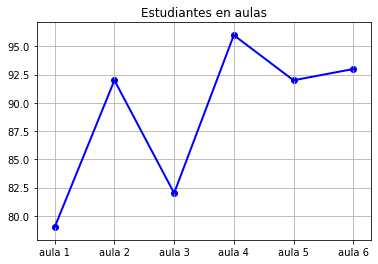

In [106]:
x = aulas_x
y = aulas_y

print(x)
print(y)

pp.plot(x,y, linewidth=2,color='blue')
pp.scatter(x,y,color='blue')
pp.title("Estudiantes en aulas")
pp.grid(True)
pp.show()

#### Metodos para simular el porceos de regreso a clases

In [107]:
def inicio_clases(env, resource, espera, prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        yield req
        print("Inicio clases: ",env.now)
        yield env.timeout(3.5)
        return
    print("Fin primera jornada: ",env.now)
    return 
    
def receso(env,n_est,resource,espera,prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        print("Inicio de receso: ",env.now)
        yield req
        print("est",n_est)
        contg = int(n_est * 0.02)
        contg = contg
        print("Numero de contagiados 2% en receso. ",contg)
        yield env.timeout(0.5)#0.5 representa media hora (30 min)   
        return
    print("Fin receso: ",env.now)
    return
    
def fin_clases(env, resource, espera, prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        yield req
        print("Inicio segunda jornada: ",env.now)
        yield env.timeout(2)
        return
    print("Fin segunda jornada: ",env.now)
    return

#### Resultado del proceso

In [108]:
env = simpy.Environment()
res = simpy.PriorityResource(env, capacity=1)

t_est = len(aula1)+len(aula2)+len(aula3)+len(aula4)+len(aula5)
#print(t_est)
jornada1 = env.process(inicio_clases(env,res, espera=0,prio=0))
receso = env.process(receso(env,t_est,res, espera=3.5,prio=1))
jornada2 = env.process(fin_clases(env,res, espera=2,prio=2))

env.run()

441
Inicio clases:  0
Inicio de receso:  3.5
est 441
Numero de contagiados 2% en receso.  8
Inicio segunda jornada:  4.0


#### Estudiantes contagiados durante el regreso a clases

In [109]:
contg = int(t_est*0.02)
t=contg+TOTAL_CONTAGIADOS
print("Número de estudiantes de última aula cerrada: ",len(aula6))
print("Numero de contagiados con prueba pcr: ",TOTAL_CONTAGIADOS)
print("Numero de contagiados en el receso de 4 aulas: ",contg)
print("Numero de contagiados en total: ",t)

Número de estudiantes de última aula cerrada:  93
Numero de contagiados con prueba pcr:  1
Numero de contagiados en el receso de 4 aulas:  8
Numero de contagiados en total:  9
